<a href="https://colab.research.google.com/github/svetaepc/ds_py/blob/master/Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bit.ly/DSNN-2

# Лекция 2. Углубление в НС и библиотеку Keras


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Introduction

На прошлой лекции мы познакомились с базовым набором инструментов библиотеки Keras, научились строить модели с помощью инструмента ```keras.Sequential()```. Однако на практике не все модели удается реализовать с помощью этого метода.

Если в модели присутствует "нелинейная" структура (т.е. есть разветвление потока данных), то ```keras.Sequential()``` не подойдет для построения такой модели. На помощь приходит инструмент *functional API*.

Обычно в глубоком обучении принято использовать следующую структуру во входных данных:

$$[n, W,H, N_{ch}],$$

где $n$ - размер подвыборки (batch_size), $N_{ch}$ - кол-во каналов (красный, зеленый, синий), $W$, $H$ - ширина и высота изображения. Однако batch_size не указывается при объявлении слоев в Keras. 



In [ ]:
img_inputs = keras.Input(shape=(32, 32, 3))
print(img_inputs.shape)

(None, 32, 32, 3)


In [ ]:
img_inputs

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'input_1')>

На сегодняшний день мы пока забудем о вышеописанной структуре и будем все входные данные трактовать как один длинный вектор длины $(W \cdot H \cdot N_{ch})$.

In [ ]:
img_inputs = keras.Input(shape=(28, 28))
inputs = layers.Flatten()(img_inputs)
inputs

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten')>

Следующий слой, который будет использовать тензор `inputs` как входные данные, должен быть объявлен следующим образом:


In [ ]:
x = layers.Dense(32)(inputs) ### объявление слоя
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Activation('relu')(x)
dense21 = layers.Dense(32, activation='relu')(x)

y = layers.Dense(32)(inputs)
y = layers.BatchNormalization()(y)
y = layers.Dropout(0.5)(y)
y = layers.Activation('relu')(y)
dense22 = layers.Dense(32, activation='relu')(y)

dense3 = layers.Add()([dense21, dense22])

In [ ]:
x = layers.Dense(32, activation='relu')(dense3)
outputs = layers.Dense(10)(x)

На этом этапе мы можем закончить добавление новых блоков и объявить модель, которая будет состоять из данных слоёв:

In [ ]:
model = keras.Model(inputs=img_inputs, outputs=outputs, name="our_first_model")

In [ ]:
model.summary()

Model: "our_first_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 32)           25120       ['flatten[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           25120       ['flatten[0][0]']                
                                                                                    

Можно, например, нарисовать модель в виде направленного графа:

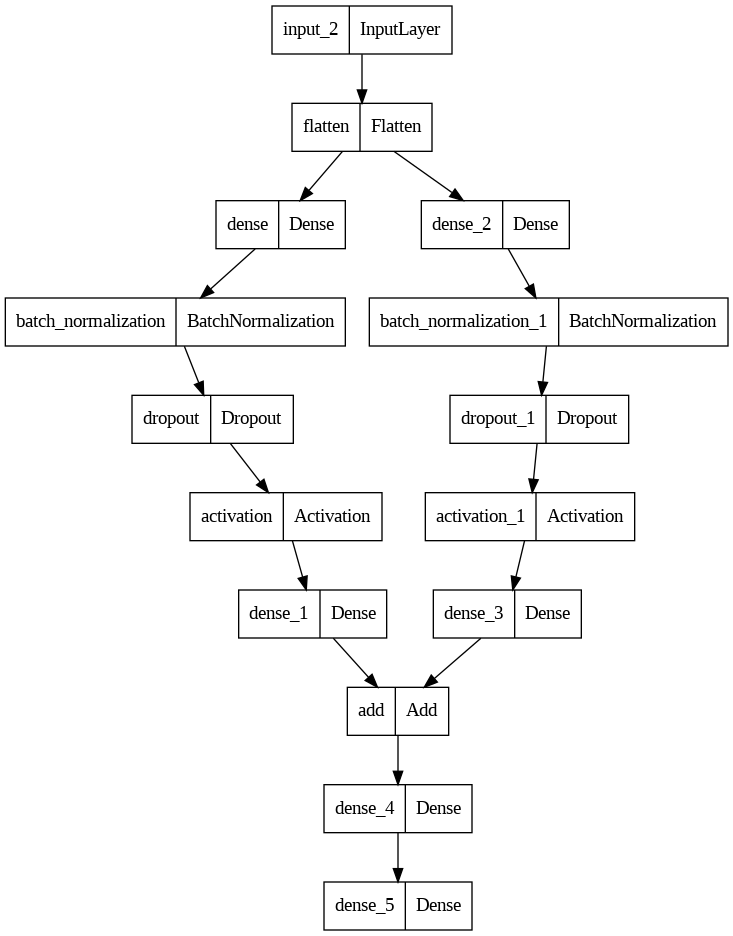

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

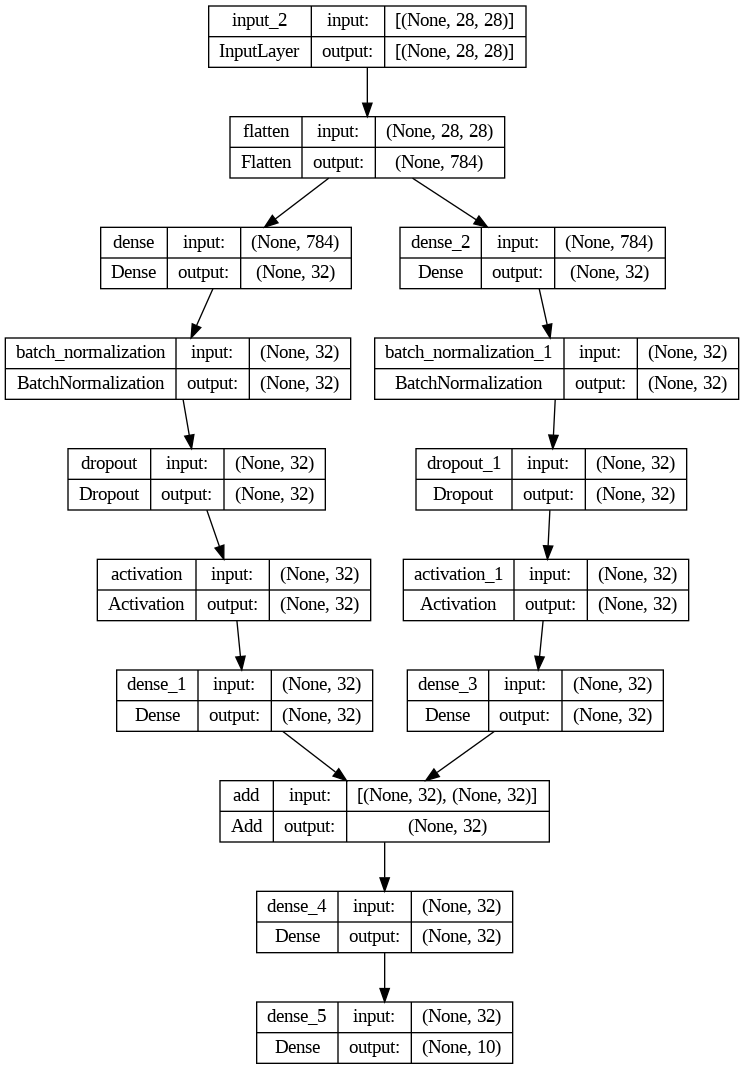

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## Обучение модели

Обучение модели происходит тем же самым образом, что и модели, объявленной с помощью класса ```Sequential()```, т.е. с помощью метода ```fit()```.


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train  # Для SparseCategoricalCrossentropy

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
keras.utils.to_categorical(y_train)  # Для CategoricalCrossEntropy

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 17s 14ms/step - loss: 0.6859 - accuracy: 0.7891 - val_loss: 0.2270 - val_accuracy: 0.9317
Epoch 2/10
750/750 [==============================] - 9s 13ms/step - loss: 0.3927 - accuracy: 0.8791 - val_loss: 0.1901 - val_accuracy: 0.9427
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3405 - accuracy: 0.8956 - val_loss: 0.1818 - val_accuracy: 0.9440
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3100 - accuracy: 0.9052 - val_loss: 0.1544 - val_accuracy: 0.9547
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.2908 - accuracy: 0.9107 - val_loss: 0.1488 - val_accuracy: 0.9563
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2756 - accuracy: 0.9144 - val_loss: 0.1378 - val_accuracy: 0.9600
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2602 - accuracy: 0.9184 - val_loss: 0.1340 - val_accuracy: 0.9595
Epo

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1232 - accuracy: 0.9615
Test loss: 0.12323782593011856
Test accuracy: 0.9614999890327454


In [ ]:
history.history

{'loss': [0.6859300136566162,
  0.3927210569381714,
  0.34054505825042725,
  0.3100086748600006,
  0.2908010184764862,
  0.2756229043006897,
  0.260186105966568,
  0.25900372862815857,
  0.24672821164131165,
  0.23991376161575317],
 'accuracy': [0.7890625,
  0.8791458606719971,
  0.8956041932106018,
  0.9052291512489319,
  0.9107499718666077,
  0.914437472820282,
  0.9184166789054871,
  0.9201041460037231,
  0.9229375123977661,
  0.9256250262260437],
 'val_loss': [0.226994127035141,
  0.1900535523891449,
  0.18178220093250275,
  0.154378280043602,
  0.1488235890865326,
  0.13783645629882812,
  0.13403110206127167,
  0.13195812702178955,
  0.12805436551570892,
  0.12388996034860611],
 'val_accuracy': [0.9316666722297668,
  0.9427499771118164,
  0.9440000057220459,
  0.9546666741371155,
  0.956250011920929,
  0.9599999785423279,
  0.9595000147819519,
  0.9616666436195374,
  0.9629999995231628,
  0.9635833501815796]}

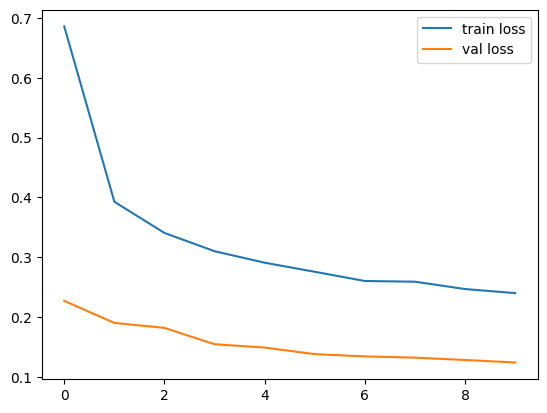

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend();

## Использование модели

In [ ]:
x_test[0].reshape((1, 28, 28)).shape

(1, 28, 28)

In [ ]:
x_test[0][None].shape

(1, 28, 28)

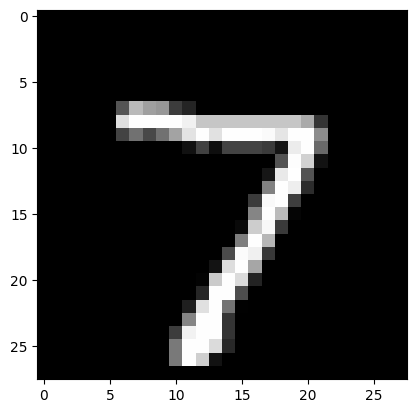

In [ ]:
plt.imshow(x_test[0], cmap='gray');

In [ ]:
predictions = model.predict(x_test[0][None])
predictions

1/1 [==============================] - 0s 313ms/step


array([[ -5.258699  ,  -1.7186708 ,   5.328241  ,   5.238602  ,
        -11.3508415 ,  -0.37265506, -11.335482  ,  13.69202   ,
         -2.3529053 ,   0.39684665]], dtype=float32)

In [ ]:
probas = keras.layers.Softmax()(predictions)
probas

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.1886060e-09, 2.8627764e-07, 1.1823671e-05, 7.9432968e-05,
        3.0053866e-11, 1.5071981e-07, 1.8418895e-11, 9.9990606e-01,
        1.3667404e-08, 2.2355396e-06]], dtype=float32)>

In [ ]:
np.argmax(probas)

7

## Сохранение модели

 `model.save()` при вызове сохраняет модель в один файл.
Сохраненный файл включает в себя:
- архитектуру модели;
- веса модели;
- config-file (если такой был создан при компиляции);
- оптимизатор и его состояние.

In [ ]:
model.save("path_to_my_model.h5")
del model

In [ ]:
model

NameError: ignored

In [ ]:
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model.h5")

In [ ]:
model.summary()

Model: "our_first_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten (Flatten)              (None, 784)          0           ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 32)           25120       ['flatten[0][0]']                
                                                                                                  
 dense_2 (Dense)                (None, 32)           25120       ['flatten[0][0]']                
                                                                                    

In [ ]:
# Save the weights to disk
model.save_weights('model_weights.h5')

In [ ]:
config_mnist = model.get_config()
config_mnist

{'name': 'our_first_model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_7'},
   'name': 'input_7',
   'inbound_nodes': []},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten_4',
    'trainable': True,
    'dtype': 'float32',
    'data_format': 'channels_last'},
   'name': 'flatten_4',
   'inbound_nodes': [[['input_7', 0, 0, {}]]]},
  {'class_name': 'Dense',
   'config': {'name': 'dense_17',
    'trainable': True,
    'dtype': 'float32',
    'units': 32,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'dense_17',
   'inbound_nodes

In [ ]:
keras.models.load_model('model_weights.h5')  # ValueError: No model found in config file

ValueError: ignored

In [ ]:
# Load the model weights from disk
model.from_config(config_mnist)
model.load_weights('model_weights.h5')

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1270 - accuracy: 0.9603


[0.12699802219867706, 0.9603000283241272]

# Дополнительные материалы

1. Переобучение и недообучение - https://youtu.be/m7P7bnLxIc4
2. Метрики для задачи регрессии - https://youtu.be/vh2smjQyhp8
3. Метрики для задачи классификации - https://youtube.com/playlist?list=PLkJJmZ1EJno6CLyvD4DHc32Fed6cPBHje
4. Борьба с переобучением - https://youtu.be/tqhsbEYKJRI
5. Регуляризация - https://youtu.be/4WcHxtYy3_8

